# PROJECT - FAKE NEWS DETECTION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [2]:
df_fake = pd.read_csv(r"C:\Users\Bhawna\Downloads\Fake.csv\Fake.csv")
df_real = pd.read_csv(r"C:\Users\Bhawna\Downloads\True.csv\True.csv")

In [3]:
df_fake.shape

(23481, 4)

In [4]:
df_real.shape

(21417, 4)

In [5]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
df_real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


## Checking Null values and Datatype of the column

In [7]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [8]:
df_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


## Label dataset for recognizing fake and real news

In [3]:
df_real['label'] = 0
df_fake['label'] = 1
df_real.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


## Combining both datasets

In [4]:
df = pd.concat([df_fake, df_real])
df = df.sample(frac=1).reset_index(drop=True)

In [11]:
df.head()

,title,text,subject,date,label
0,WATCH: Van Jones Scorches Insane Republican W...,Donald Trump is an extreme narcissist who alwa...,News,"October 15, 2017",1
1,Activists urge Apple to drop apps that play up...,MANILA (Reuters) - A group of civil society or...,worldnews,"October 13, 2017",0
2,Pence: Both sides would accept clear outcome t...,WASHINGTON (Reuters) - Republican vice preside...,politicsNews,"November 6, 2016",0
3,YIKES! 30 Years Of HILLARY’S LIES Have Driven ...,This is not a fluke. After years of towing the...,left-news,"May 2, 2016",1
4,ANGRY LEFTIST CAUGHT On VIDEO Stealing Student...,***WARNING***This video will make your blood b...,left-news,"Sep 28, 2017",1


<Axes: xlabel='label'>

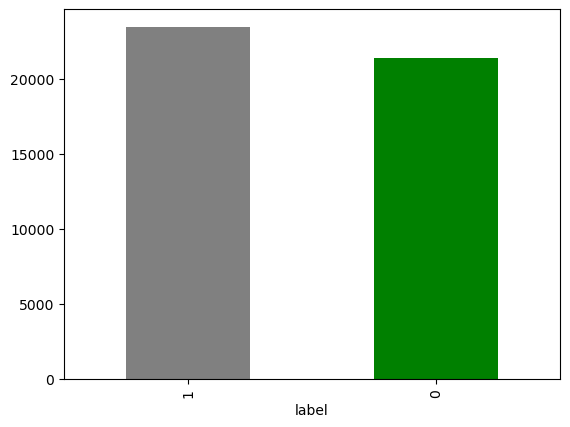

In [12]:
df['label'].value_counts().plot.bar(color=['grey','green'])

In [13]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [14]:
from wordcloud import WordCloud

In [8]:
df['content'] = df['title'] +' '+ df['text']

In [16]:
# Fake and real news text
fake_text = ' '.join(df[df['label']==1]['content'])
real_text = ' '.join(df[df['label']==0]['content'])

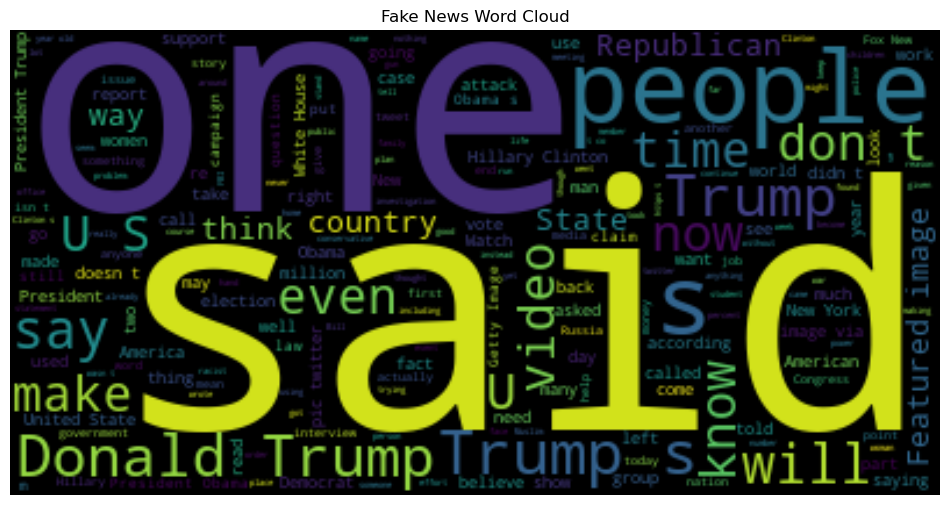

In [18]:
# Fake news word cloud
fake_wc = WordCloud().generate(fake_text)
plt.figure(figsize=(12,8))
plt.imshow(fake_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Fake News Word Cloud')
plt.show()

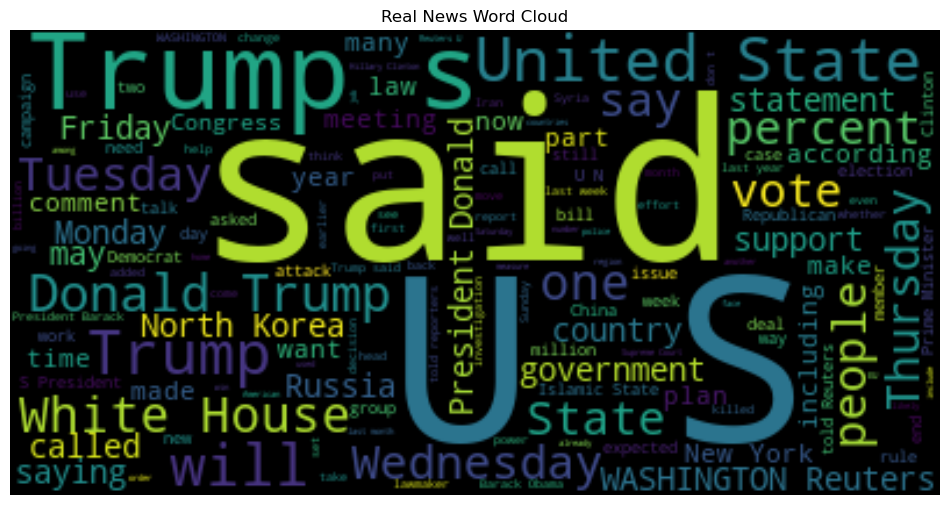

In [19]:
# Real news cloud
real_wc = WordCloud().generate(real_text)
plt.figure(figsize=(12,8))
plt.imshow(real_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Real News Word Cloud')
plt.show()

In [6]:
df['text_length'] = df['content'].apply(lambda x: len(x.split()))

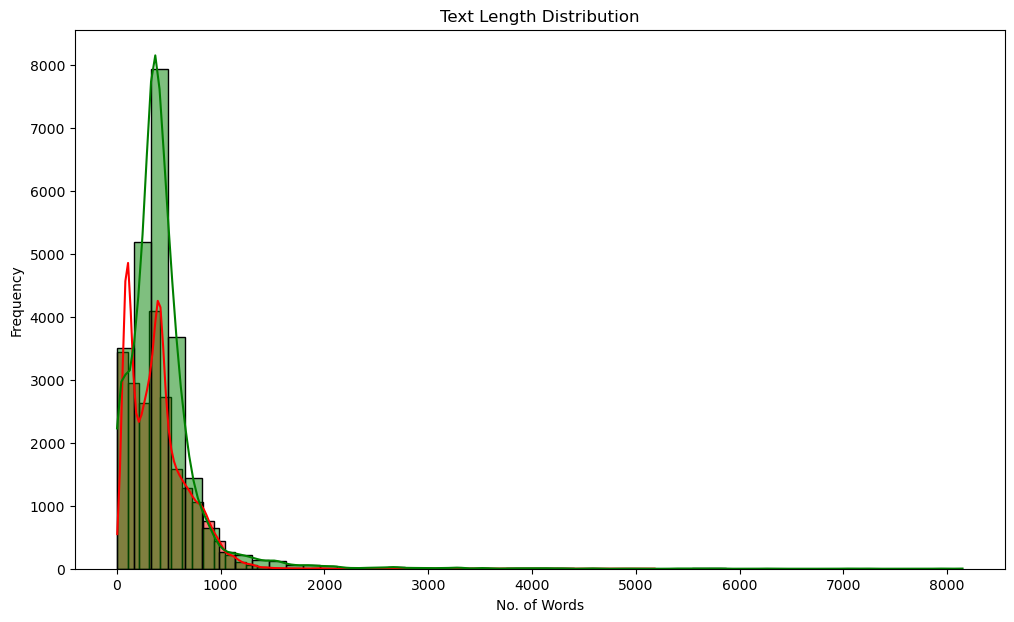

In [28]:
plt.figure(figsize=(12,7))
sns.histplot(df[df['label']==0]['text_length'], bins=50, kde=True, color='red')
sns.histplot(df[df['label']==1]['text_length'], bins=50, kde=True, color='green')
plt.title('Text Length Distribution')
plt.xlabel('No. of Words')
plt.ylabel('Frequency')
plt.show()

In [9]:
fake_text = ' '.join(df[df['label']==1]['content'])
real_text = ' '.join(df[df['label']==0]['content'])

In [8]:
from collections import Counter

In [19]:
fake_words = fake_text.lower().split()
fake_count = Counter(fake_words)

In [20]:
real_words = real_text.lower().split()
real_count = Counter(real_words)

In [21]:
print(f'Top 20 most common fake news words: \n{fake_count.most_common(20)}')

Top 20 most common fake news words: 
[('the', 531506), ('to', 298008), ('of', 240302), ('and', 225811), ('a', 213077), ('in', 167339), ('that', 145837), ('s', 128331), ('is', 110477), ('for', 95859), ('on', 83423), ('he', 77929), ('trump', 72126), ('it', 71238), ('was', 67786), ('with', 64460), ('his', 59513), ('as', 56392), ('this', 52827), ('be', 48709)]


In [9]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bhawna\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [11]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [12]:
fake_words = [w for w in fake_text.lower().split() if w not in stop_words]
fake_count = Counter(fake_words)
real_words = [w for w in real_text.lower().split() if w not in stop_words]
real_count = Counter(real_words)

In [13]:
print(f'Top 20 most common fake news words: \n{fake_count.most_common(20)}')

Top 20 most common fake news words: 
[('trump', 72126), ('would', 23505), ('president', 23051), ('people', 22775), ('one', 22102), ('said', 21406), ('obama', 17688), ('donald', 17618), ('like', 17224), ('clinton', 16496), ('new', 14818), ('also', 14797), ('hillary', 14175), ('even', 13689), ('white', 12971), ('news', 12711), ('us', 12340), ('state', 11219), ('get', 10935), ('could', 10305)]


In [14]:
print(f'Top 20 most common fake news words: \n{real_count.most_common(20)}')

Top 20 most common fake news words: 
[('said', 72049), ('u.s.', 42148), ('trump', 40886), ('would', 31591), ('-', 31413), ('president', 23824), ('said.', 21583), ('(reuters)', 21239), ('new', 17438), ('state', 16189), ('house', 15933), ('also', 15881), ('government', 15704), ('united', 15568), ('republican', 15124), ('told', 14262), ('could', 13823), ('last', 12598), ('people', 12489), ('states', 11951)]


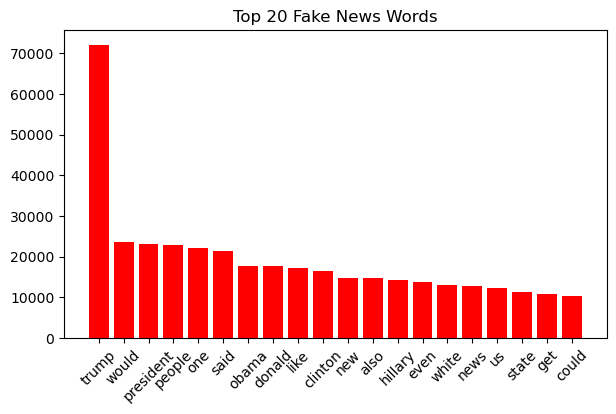

In [18]:
words, count = zip(*fake_count.most_common(20))
plt.figure(figsize=(7,4))
plt.bar(words, count, color='red')
plt.xticks(rotation=45)
plt.title('Top 20 Fake News Words')
plt.show()

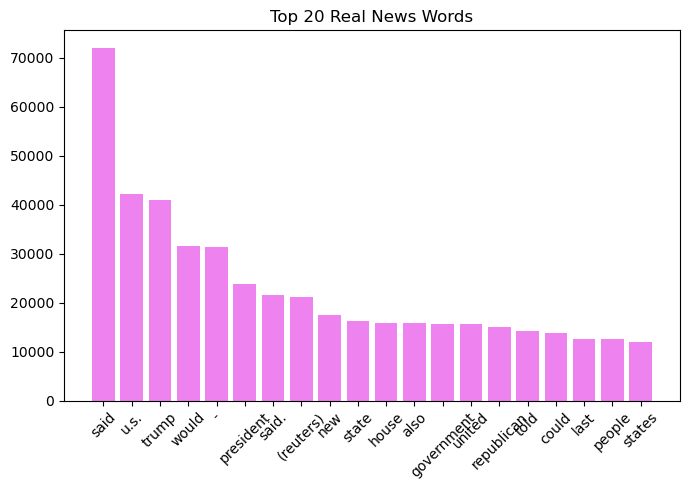

In [22]:
words, count = zip(*real_count.most_common(20))
plt.figure(figsize=(7,5))
plt.bar(words, count, color='violet')
plt.xticks(rotation=45)
plt.title('Top 20 Real News Words')
plt.tight_layout()
plt.show()

## Splitting the dataset

In [6]:
from sklearn.model_selection import train_test_split

In [10]:
x = df['content']
y = df['label']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=36)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

## Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr = LogisticRegression(class_weight='balanced',
    random_state=40,
    n_jobs=-1)

In [30]:
lr.fit(x_train_tfidf, y_train)

LogisticRegression(class_weight='balanced', n_jobs=-1, random_state=40)

In [31]:
y_pred = lr.predict(x_test_tfidf)

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [33]:
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}\nClassification Report: \n{classification_report(y_test, y_pred)}')

Accuracy score: 0.9858574610244989
Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4237
           1       0.99      0.99      0.99      4743

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



<Axes: >

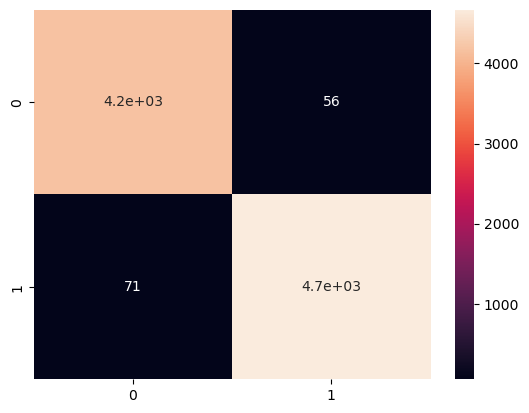

In [34]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [14]:
x_tfidf =  tfidf.fit_transform(x)

## Decision Tree Classifier

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_validate
kfold = StratifiedKFold(n_splits=4)

In [40]:
dt = DecisionTreeClassifier()

In [42]:
rand_param_dt = {'criterion':["gini", "entropy", "log_loss"],
    'splitter':['best','random'],
    'max_depth':[2,3,4,5],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[1,2],
    'max_features':["sqrt", "log2"],
    'random_state':[30,40,42],
    'class_weight':['balanced']}

In [44]:
rand_dt = RandomizedSearchCV(estimator=dt,
    param_distributions=rand_param_dt,
    n_jobs=-1,
    n_iter=10,)

In [45]:
rand_dt.fit(x_train_tfidf, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'class_weight': ['balanced'],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [2, 3, 4, 5],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 3, 4],
                                        'random_state': [30, 40, 42],
                                        'splitter': ['best', 'random']})

In [46]:
best_model = rand_dt.best_estimator_
y_pred = best_model.predict(x_test_tfidf)

In [48]:
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.52      0.91      0.66      4237
           1       0.75      0.24      0.37      4743

    accuracy                           0.56      8980
   macro avg       0.63      0.58      0.51      8980
weighted avg       0.64      0.56      0.51      8980



## Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf = RandomForestClassifier()

In [54]:
rand_param_rf = { 'n_estimators':[50,80],
    'criterion':["gini", "entropy"],
    'max_depth':[3,4,5],
    'min_samples_split':[2,3,],
    'min_samples_leaf':[1,2],
    'max_features':["sqrt", "log2"],
    'random_state':[30,35],
    'class_weight':['balanced']}

In [55]:
rand_rf = RandomizedSearchCV(estimator=rf,
    param_distributions=rand_param_rf,
    n_iter=4,
    n_jobs=-1)

In [56]:
rand_rf.fit(x_train_tfidf, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=4, n_jobs=-1,
                   param_distributions={'class_weight': ['balanced'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 3],
                                        'n_estimators': [50, 80],
                                        'random_state': [30, 35]})

In [57]:
best_model = rand_rf.best_estimator_
y_pred = best_model.predict(x_test_tfidf)

In [58]:
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      4237
           1       0.96      0.90      0.93      4743

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



## Adaboost Classifier

In [59]:
from sklearn.ensemble import AdaBoostClassifier

In [60]:
adb = AdaBoostClassifier(n_estimators=40,
    learning_rate=0.7, random_state=42)

In [64]:
cross_validate(adb, x_tfidf, y, cv=kfold, return_train_score=True, n_jobs=-1)

{'fit_time': array([198.73384213, 200.2272234 , 193.95653415, 198.21979904]),
 'score_time': array([3.7834909 , 3.9698472 , 3.88762212, 3.92120981]),
 'test_score': array([0.99216036, 0.99287305, 0.99260513, 0.99331789]),
 'train_score': array([0.99296172, 0.99287263, 0.99287284, 0.99242739])}

In [3]:
subset_df_fake = df_fake.sample(1000, random_state=42)
subset_df_fake.to_csv("fake_news_subset.csv", index=False)


In [4]:
subset_df_fake = df_real.sample(1000, random_state=42)
subset_df_fake.to_csv("real_news_subset.csv", index=False)